# Problem Statement
__Prepare rules for the books data sets.__ 
1. Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2. Change the minimum length in apriori algorithm
3. Visulize the obtained rules using different plots 

# 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 2. Import Dataset

In [2]:
book_data = pd.read_csv('book.csv')
book_data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


# 3. EDA
## 3.1 Initial Understanding

In [9]:
book_data.shape

(2000, 11)

In [10]:
book_data.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [11]:
book_data.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [12]:
book_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ChildBks,2000.0,0.4230,0.494159,0.0,0.0,0.0,1.0,1.0
YouthBks,2000.0,0.2475,0.431668,0.0,0.0,0.0,0.0,1.0
CookBks,2000.0,0.4310,0.495340,0.0,0.0,0.0,1.0,1.0
DoItYBks,2000.0,0.2820,0.450086,0.0,0.0,0.0,1.0,1.0
RefBks,2000.0,0.2145,0.410578,0.0,0.0,0.0,0.0,1.0
ArtBks,2000.0,0.2410,0.427797,0.0,0.0,0.0,0.0,1.0
GeogBks,2000.0,0.2760,0.447129,0.0,0.0,0.0,1.0,1.0
ItalCook,2000.0,0.1135,0.317282,0.0,0.0,0.0,0.0,1.0
ItalAtlas,2000.0,0.0370,0.188809,0.0,0.0,0.0,0.0,1.0
ItalArt,2000.0,0.0485,0.214874,0.0,0.0,0.0,0.0,1.0


In [13]:
#most popular items
count = book_data.loc[:,:].sum()
pop_item = count.sort_values(0, ascending = False)
pop_item = pop_item.to_frame()
pop_item = pop_item.reset_index()
pop_item = pop_item.rename(columns = {'index': 'itemsets',0: 'count'})
pop_item

,itemsets,count
0,CookBks,862
1,ChildBks,846
2,DoItYBks,564
3,GeogBks,552
4,YouthBks,495
5,ArtBks,482
6,RefBks,429
7,ItalCook,227
8,Florence,217
9,ItalArt,97


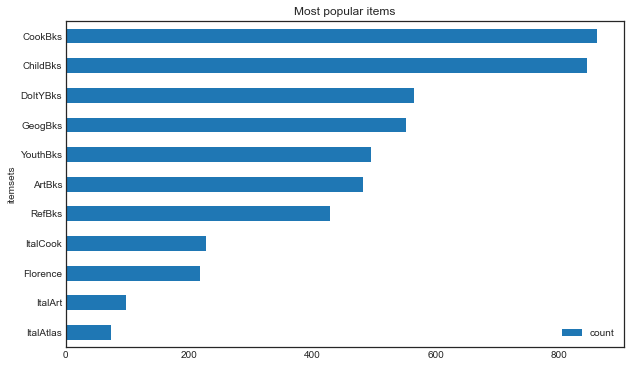

In [14]:
#Data Visualization
plt.rcParams['figure.figsize'] = (10, 6)
matplotlib.style.use('seaborn-white') #dark_background
ax = pop_item.plot.barh(x = 'itemsets', y = 'count')
plt.title('Most popular items')
plt.gca().invert_yaxis()

## 3.2 Data Preparation
No data preprocessing is need as data is already in encoded format and also null values are absent.

# 4. Model Building

In [15]:
#min_support -2%  #cdr the books that are buyed by at least 2% of customers
frequent_itm_set = apriori(df=book_data,min_support=0.02,use_colnames=True)
frequent_itm_set

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
271,0.0210,"(CookBks, DoItYBks, ArtBks, RefBks, YouthBks, ..."
272,0.0270,"(CookBks, DoItYBks, GeogBks, RefBks, YouthBks,..."
273,0.0310,"(CookBks, ArtBks, DoItYBks, GeogBks, YouthBks,..."
274,0.0225,"(CookBks, ArtBks, GeogBks, RefBks, YouthBks, C..."


In [16]:
len(list(frequent_itm_set['itemsets'])) 

276

In [17]:
#generating rules
#association rule using confidence
asso_rules_1 = association_rules(df=frequent_itm_set,metric='confidence',min_threshold=0.8)
asso_rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
1,(ItalArt),(CookBks),0.0485,0.4310,0.0410,0.845361,1.961394,0.020096,3.679533
2,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.000000,4.662005,0.029063,inf
3,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.000000,4.149378,0.036812,inf
4,"(DoItYBks, YouthBks)",(ChildBks),0.1155,0.4230,0.0950,0.822511,1.944470,0.046143,3.250902
...,...,...,...,...,...,...,...,...,...
258,"(DoItYBks, ArtBks, GeogBks, YouthBks, ChildBks)",(CookBks),0.0335,0.4310,0.0310,0.925373,2.147037,0.016561,7.624600
259,"(CookBks, ArtBks, GeogBks, RefBks, YouthBks)",(ChildBks),0.0255,0.4230,0.0225,0.882353,2.085941,0.011713,4.904500
260,"(ArtBks, GeogBks, RefBks, YouthBks, ChildBks)",(CookBks),0.0270,0.4310,0.0225,0.833333,1.933488,0.010863,3.414000
261,"(CookBks, DoItYBks, ArtBks, GeogBks, RefBks)",(ChildBks),0.0275,0.4230,0.0240,0.872727,2.063185,0.012368,4.533571


In [18]:
result_1 = asso_rules_1.drop(['antecedent support','consequent support','leverage','conviction'],axis=1)
result_1

,antecedents,consequents,support,confidence,lift
0,(ItalCook),(CookBks),0.1135,1.000000,2.320186
1,(ItalArt),(CookBks),0.0410,0.845361,1.961394
2,(ItalAtlas),(RefBks),0.0370,1.000000,4.662005
3,(ItalArt),(ArtBks),0.0485,1.000000,4.149378
4,"(DoItYBks, YouthBks)",(ChildBks),0.0950,0.822511,1.944470
...,...,...,...,...,...
258,"(DoItYBks, ArtBks, GeogBks, YouthBks, ChildBks)",(CookBks),0.0310,0.925373,2.147037
259,"(CookBks, ArtBks, GeogBks, RefBks, YouthBks)",(ChildBks),0.0225,0.882353,2.085941
260,"(ArtBks, GeogBks, RefBks, YouthBks, ChildBks)",(CookBks),0.0225,0.833333,1.933488
261,"(CookBks, DoItYBks, ArtBks, GeogBks, RefBks)",(ChildBks),0.0240,0.872727,2.063185


In [19]:
result_1 = result_1[result_1.lift>1]
result_1.sort_values('lift',ascending=False)

,antecedents,consequents,support,confidence,lift
219,"(ItalAtlas, CookBks, ChildBks)","(ItalCook, RefBks)",0.0200,0.888889,19.115890
147,"(ItalAtlas, CookBks)","(ItalCook, RefBks)",0.0230,0.807018,17.355216
249,"(GeogBks, CookBks, ItalArt)","(ItalCook, ArtBks)",0.0240,0.960000,16.991150
229,"(ItalArt, CookBks, ChildBks)","(ItalCook, ArtBks)",0.0285,0.950000,16.814159
242,"(CookBks, DoItYBks, ItalArt)","(ItalCook, ArtBks)",0.0250,0.925926,16.388069
...,...,...,...,...,...
21,"(RefBks, YouthBks)",(CookBks),0.0775,0.803109,1.863362
80,"(RefBks, ArtBks, ChildBks)",(CookBks),0.0610,0.802632,1.862254
22,"(ArtBks, YouthBks)",(CookBks),0.0810,0.801980,1.860743
26,"(RefBks, DoItYBks)",(CookBks),0.0845,0.800948,1.858348


Text(0, 0.5, 'Confidence')

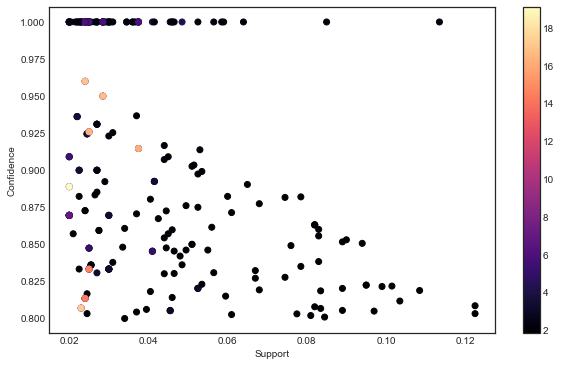

In [21]:
plt.scatter(result_1["support"],result_1["confidence"],c=result_1['lift'],cmap='magma')
plt.colorbar()
plt.xlabel('Support')
plt.ylabel('Confidence')

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

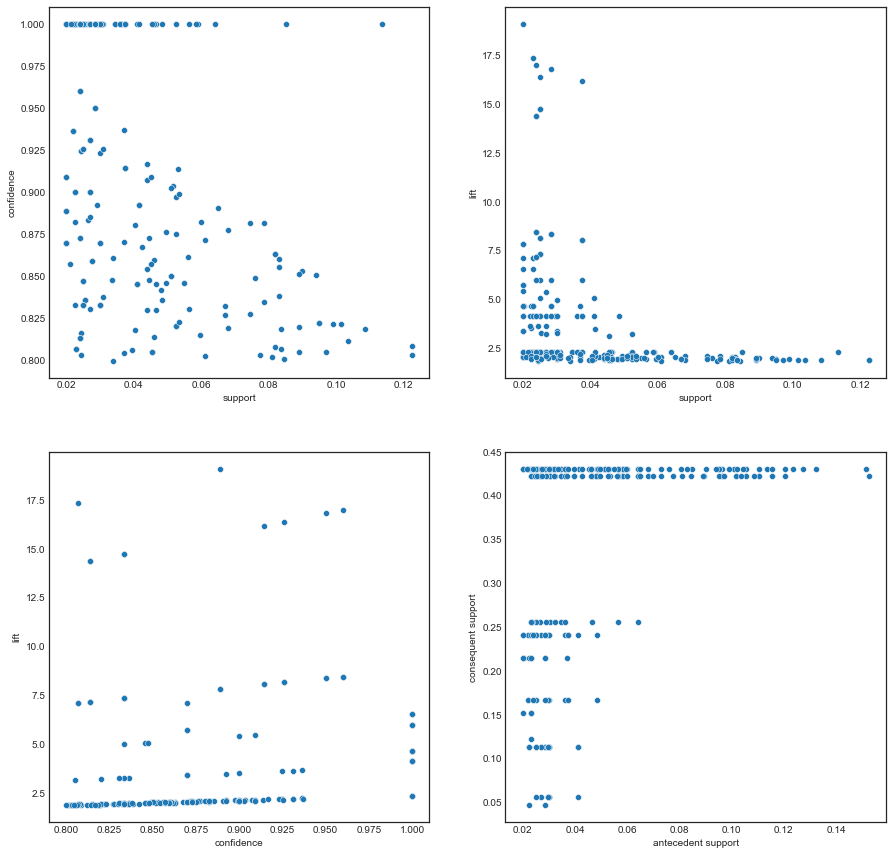

In [22]:
#Setting up the style
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
#Plotting the relationship between the metrics
plt.subplot(221)
sns.scatterplot(x=asso_rules_1["support"], y=asso_rules_1["confidence"],data=asso_rules_1)
plt.subplot(222)
sns.scatterplot(x=asso_rules_1["support"], y=asso_rules_1["lift"],data=asso_rules_1)
plt.subplot(223)
sns.scatterplot(x=asso_rules_1["confidence"], y=asso_rules_1["lift"],data=asso_rules_1)
plt.subplot(224)
sns.scatterplot(x=asso_rules_1["antecedent support"], y=asso_rules_1["consequent support"],data=asso_rules_1)

Text(0.5, 0, 'lift')

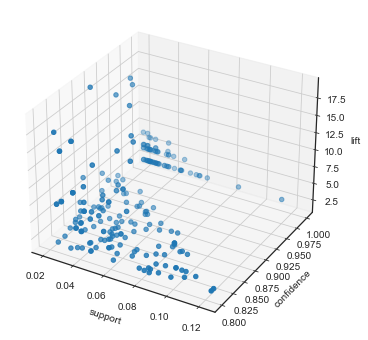

In [23]:
support    = asso_rules_1["support"]
confidence = asso_rules_1["confidence"]
lift       = asso_rules_1["lift"]

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

### To get another set of rules - Taking different values of support and confidence.

In [60]:
# support - 5%
frequent_itm_set = apriori(df=book_data,min_support=0.02,use_colnames=True)

asso_rules_2 = association_rules(df=frequent_itm_set,metric='confidence',min_threshold=0.7)
asso_rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(ItalCook),(ChildBks),0.1135,0.423,0.0850,0.748899,1.770446,0.036990,2.297877
3,(ItalAtlas),(ChildBks),0.0370,0.423,0.0285,0.770270,1.820970,0.012849,2.511647
4,(ItalArt),(ChildBks),0.0485,0.423,0.0360,0.742268,1.754771,0.015484,2.238760
...,...,...,...,...,...,...,...,...,...
386,"(ArtBks, GeogBks, RefBks, YouthBks, ChildBks)",(CookBks),0.0270,0.431,0.0225,0.833333,1.933488,0.010863,3.414000
387,"(GeogBks, RefBks, ArtBks, YouthBks)","(CookBks, ChildBks)",0.0305,0.256,0.0225,0.737705,2.881660,0.014692,2.836500
388,"(CookBks, DoItYBks, ArtBks, GeogBks, RefBks)",(ChildBks),0.0275,0.423,0.0240,0.872727,2.063185,0.012368,4.533571
389,"(DoItYBks, ArtBks, GeogBks, RefBks, ChildBks)",(CookBks),0.0275,0.431,0.0240,0.872727,2.024889,0.012148,4.470714


Text(0.5, 0, 'lift')

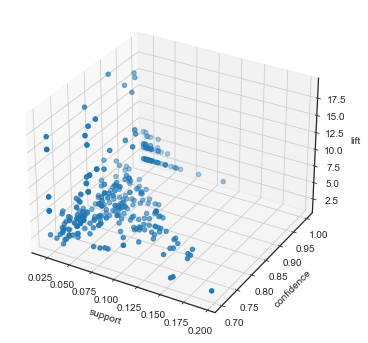

In [61]:
support    = asso_rules_2["support"]
confidence = asso_rules_2["confidence"]
lift       = asso_rules_2["lift"]

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

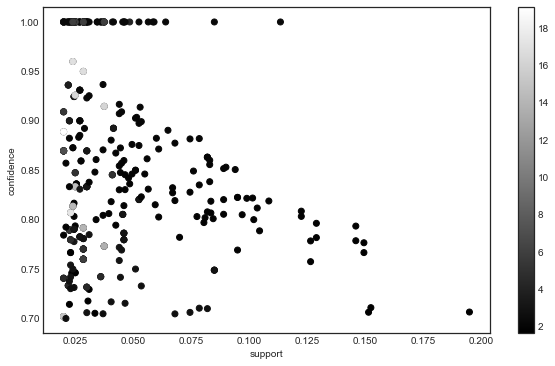

In [62]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")

In [63]:
# support - 2%
frequent_itm_set = apriori(df=book_data,min_support=0.02,use_colnames=True)

asso_rules_3 = association_rules(df=frequent_itm_set,metric='confidence',min_threshold=0.6)
asso_rules_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
...,...,...,...,...,...,...,...,...,...
591,"(GeogBks, RefBks, ArtBks, YouthBks)","(CookBks, ChildBks)",0.0305,0.256,0.0225,0.737705,2.881660,0.014692,2.836500
592,"(CookBks, DoItYBks, ArtBks, GeogBks, RefBks)",(ChildBks),0.0275,0.423,0.0240,0.872727,2.063185,0.012368,4.533571
593,"(CookBks, DoItYBks, ArtBks, RefBks, ChildBks)",(GeogBks),0.0370,0.276,0.0240,0.648649,2.350176,0.013788,2.060615
594,"(DoItYBks, ArtBks, GeogBks, RefBks, ChildBks)",(CookBks),0.0275,0.431,0.0240,0.872727,2.024889,0.012148,4.470714


Text(0.5, 0, 'lift')

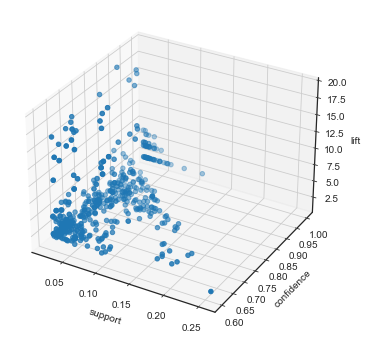

In [64]:
support    = asso_rules_3["support"]
confidence = asso_rules_3["confidence"]
lift       = asso_rules_3["lift"]

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

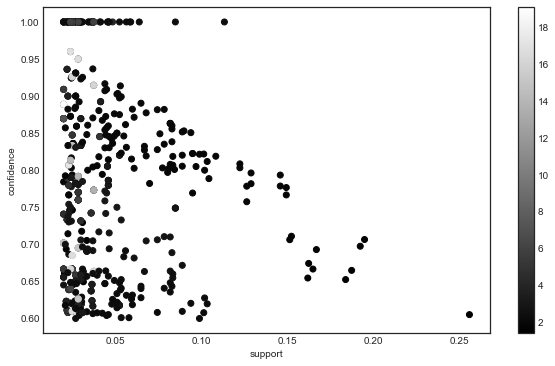

In [65]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")

In [67]:
# support - 2% for apriori algorithm
frequent_itm_set = apriori(df=book_data,min_support=0.02,use_colnames=True)
#
asso_rules_4 = association_rules(df=frequent_itm_set,metric='confidence',min_threshold=0.5)
asso_rules_4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
999,"(DoItYBks, ArtBks, GeogBks, RefBks, ChildBks)",(CookBks),0.0275,0.4310,0.0240,0.872727,2.024889,0.012148,4.470714
1000,"(RefBks, CookBks, DoItYBks, ArtBks)","(GeogBks, ChildBks)",0.0425,0.1950,0.0240,0.564706,2.895928,0.015712,1.849324
1001,"(GeogBks, CookBks, RefBks, ArtBks)","(DoItYBks, ChildBks)",0.0460,0.1840,0.0240,0.521739,2.835539,0.015536,1.706182
1002,"(GeogBks, RefBks, DoItYBks, ArtBks)","(CookBks, ChildBks)",0.0320,0.2560,0.0240,0.750000,2.929688,0.015808,2.976000


<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

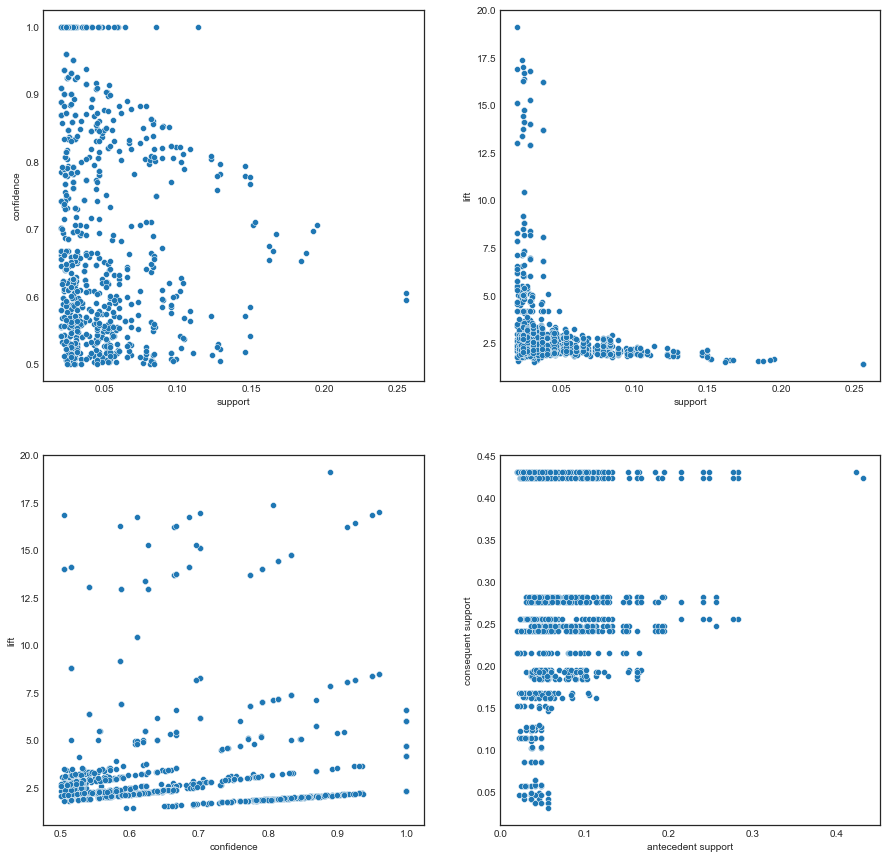

In [68]:
#Setting up the style
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
#Plotting the relationship between the metrics
plt.subplot(221)
sns.scatterplot(x=asso_rules_4["support"], y=asso_rules_4["confidence"],data=asso_rules_4)
plt.subplot(222)
sns.scatterplot(x=asso_rules_4["support"], y=asso_rules_4["lift"],data=asso_rules_4)
plt.subplot(223)
sns.scatterplot(x=asso_rules_4["confidence"], y=asso_rules_4["lift"],data=asso_rules_4)
plt.subplot(224)
sns.scatterplot(x=asso_rules_4["antecedent support"], y = asso_rules_4["consequent support"],data=asso_rules_4)

Text(0.5, 0, 'lift')

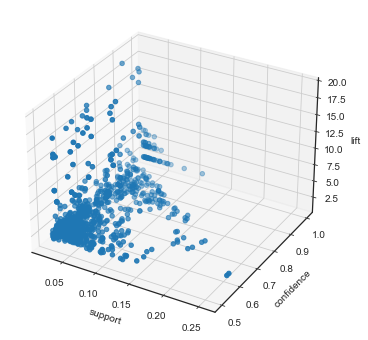

In [69]:
support    = asso_rules_4["support"]
confidence = asso_rules_4["confidence"]
lift       = asso_rules_4["lift"]

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

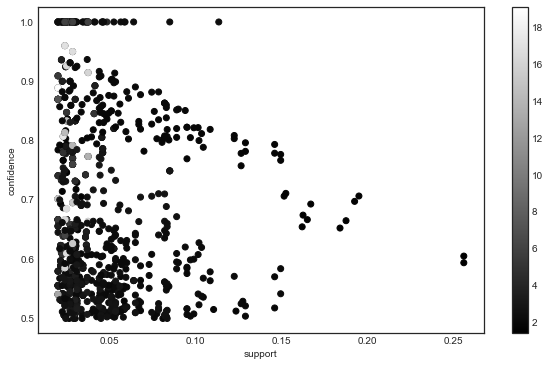

In [70]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")

In [71]:
# support - 1% for apriori algorithm
frequent_itm_set = apriori(df=book_data,min_support=0.01,use_colnames=True)
# min_threshhold = 50%
asso_rules_5 = association_rules(df=frequent_itm_set,metric='confidence',min_threshold=0.5)
asso_rules_5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
3267,"(ChildBks, RefBks, ItalArt)","(ItalCook, ItalAtlas, CookBks, ArtBks)",0.0180,0.0130,0.0110,0.611111,47.008547,0.010766,2.538000
3268,"(ItalAtlas, ChildBks, ItalArt)","(ItalCook, CookBks, RefBks, ArtBks)",0.0145,0.0235,0.0110,0.758621,32.281731,0.010659,4.045500
3269,"(ItalAtlas, ArtBks)","(CookBks, ChildBks, ItalCook, RefBks, ItalArt)",0.0180,0.0145,0.0110,0.611111,42.145594,0.010739,2.534143
3270,"(RefBks, ItalArt)","(CookBks, ArtBks, ItalCook, ItalAtlas, ChildBks)",0.0200,0.0115,0.0110,0.550000,47.826087,0.010770,2.196667


<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

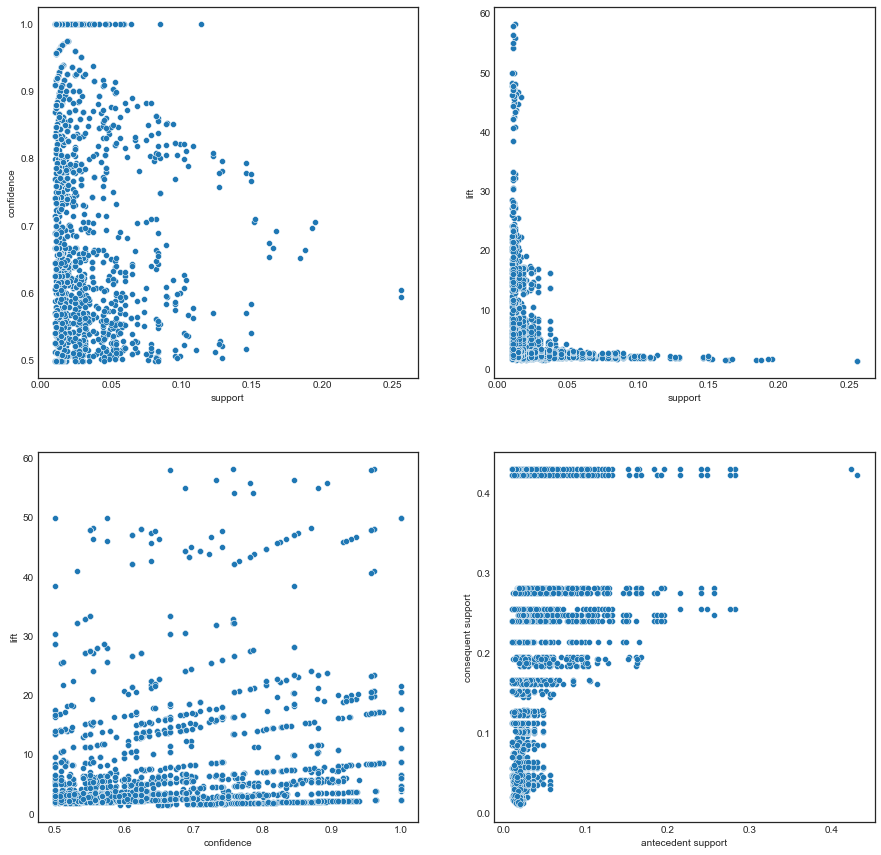

In [72]:
#Setting up the style
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
#Plotting the relationship between the metrics
plt.subplot(221)
sns.scatterplot(x=asso_rules_5["support"], y=asso_rules_5["confidence"],data=asso_rules_5)
plt.subplot(222)
sns.scatterplot(x=asso_rules_5["support"], y=asso_rules_5["lift"],data=asso_rules_5)
plt.subplot(223)
sns.scatterplot(x=asso_rules_5["confidence"], y=asso_rules_5["lift"],data=asso_rules_5)
plt.subplot(224)
sns.scatterplot(x=asso_rules_5["antecedent support"], y = asso_rules_5["consequent support"],data=asso_rules_5)

Text(0.5, 0, 'lift')

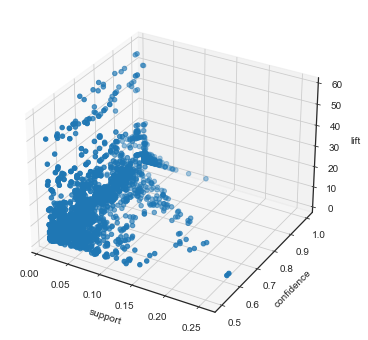

In [73]:
support    = asso_rules_5["support"]
confidence = asso_rules_5["confidence"]
lift       = asso_rules_5["lift"]

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

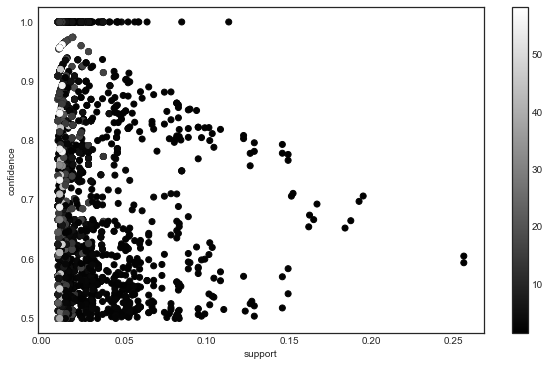

In [74]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")

<AxesSubplot:xlabel='antecedents', ylabel='consequents'>

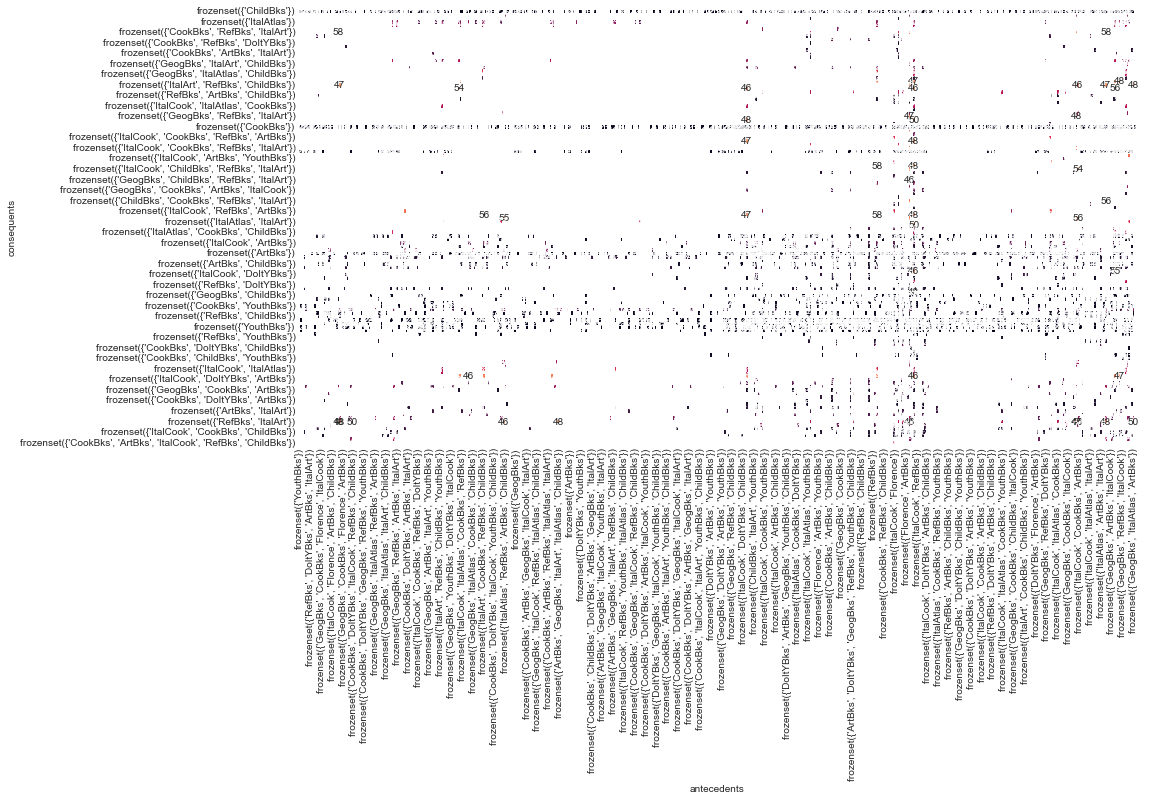

In [77]:
pivot = asso_rules_5.pivot(index='consequents',columns = 'antecedents', values= 'lift')
plt.figure(figsize=(15,8))
sns.heatmap(pivot,annot=True,cbar=False)
# We also remember that lift has an important threshold at  1.0  and decide that it is important to replace the colorbar with annotations, so you can determine whether a value is greater than  1.0 .

In [84]:
# support - 1% for apriori algorithm
frequent_itm_set = apriori(df=book_data,min_support=0.01,use_colnames=True)
# min_threshhold = 45%
asso_rules_6 = association_rules(df=frequent_itm_set,metric='confidence',min_threshold=0.45)
asso_rules_6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
3781,"(ItalAtlas, ChildBks, ItalArt)","(ItalCook, CookBks, RefBks, ArtBks)",0.0145,0.0235,0.0110,0.758621,32.281731,0.010659,4.045500
3782,"(ItalAtlas, ArtBks)","(CookBks, ChildBks, ItalCook, RefBks, ItalArt)",0.0180,0.0145,0.0110,0.611111,42.145594,0.010739,2.534143
3783,"(ItalCook, ItalAtlas)","(CookBks, ArtBks, ItalArt, RefBks, ChildBks)",0.0230,0.0150,0.0110,0.478261,31.884058,0.010655,1.887917
3784,"(RefBks, ItalArt)","(CookBks, ArtBks, ItalCook, ItalAtlas, ChildBks)",0.0200,0.0115,0.0110,0.550000,47.826087,0.010770,2.196667


<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

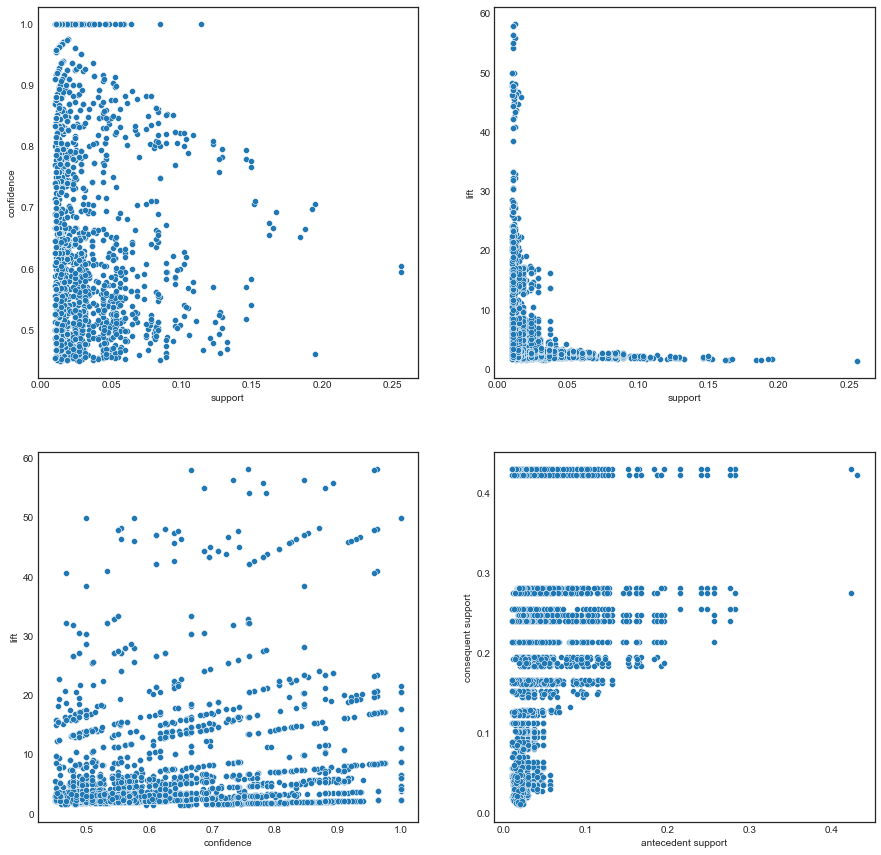

In [85]:
#Setting up the style
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
#Plotting the relationship between the metrics
plt.subplot(221)
sns.scatterplot(x=asso_rules_6["support"], y=asso_rules_6["confidence"],data=asso_rules_6)
plt.subplot(222)
sns.scatterplot(x=asso_rules_6["support"], y=asso_rules_6["lift"],data=asso_rules_6)
plt.subplot(223)
sns.scatterplot(x=asso_rules_6["confidence"], y=asso_rules_6["lift"],data=asso_rules_6)
plt.subplot(224)
sns.scatterplot(x=asso_rules_6["antecedent support"], y = asso_rules_6["consequent support"],data=asso_rules_6)

Text(0.5, 0, 'lift')

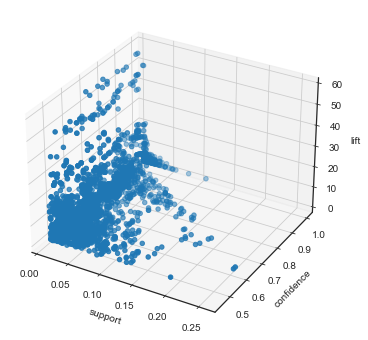

In [86]:
support    = asso_rules_6["support"]
confidence = asso_rules_6["confidence"]
lift       = asso_rules_6["lift"]

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

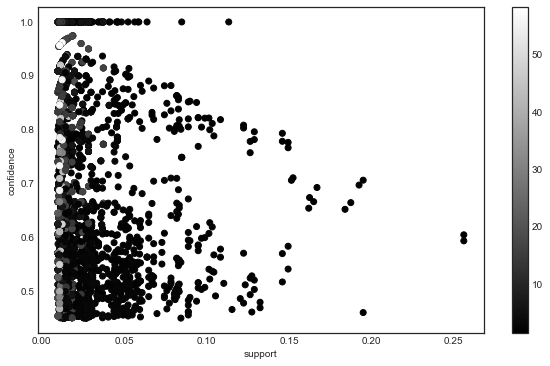

In [87]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")

<AxesSubplot:xlabel='antecedents', ylabel='consequents'>

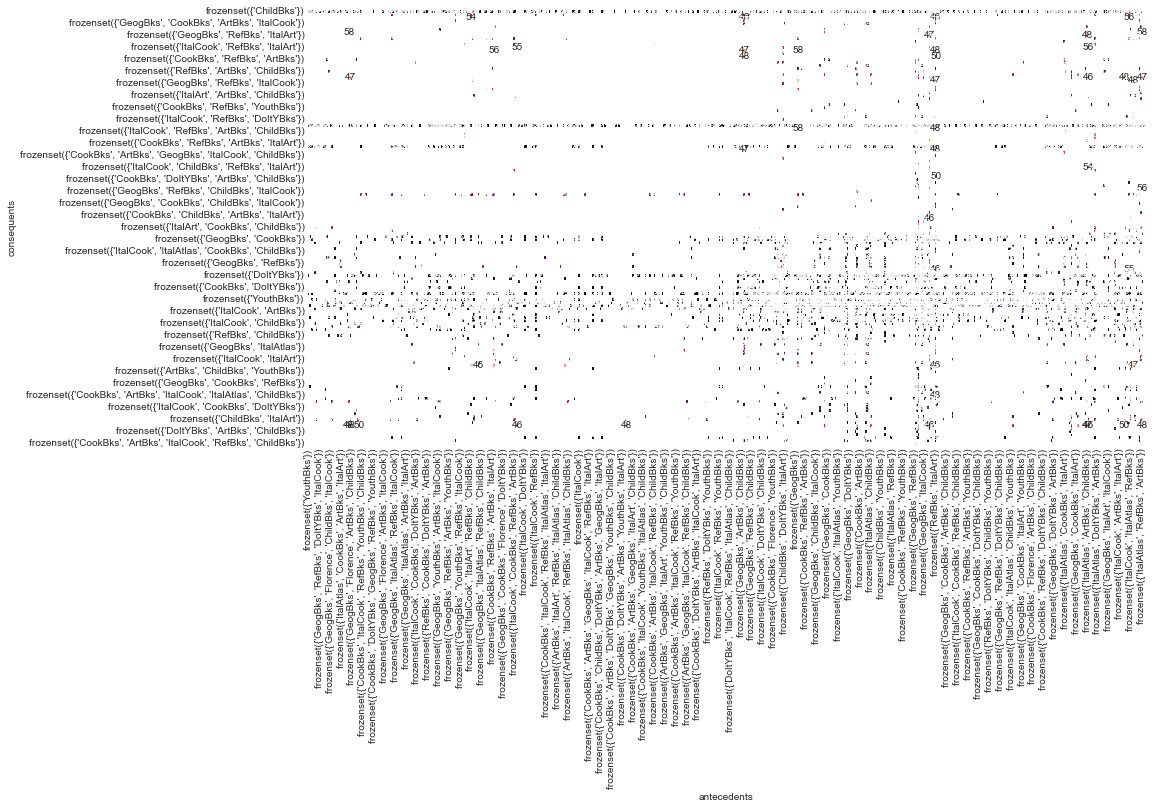

In [88]:
pivot = asso_rules_6.pivot(index='consequents',columns = 'antecedents', values= 'lift')
plt.figure(figsize=(15,8))
sns.heatmap(pivot,annot=True,cbar=False)
# We also remember that lift has an important threshold at  1.0  and decide that it is important to replace the colorbar with annotations, so you can determine whether a value is greater than  1.0 .